In [83]:
# x+y
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
import os
from mpl_toolkits.mplot3d import Axes3D
import torch.nn.functional as F
import pandas as pd


output_dir = "outputs/"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)



In [84]:
def save_n_plot(*args, filename="file"):
    foldername = "/".join(filename.split("/")[:-1])
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    plt.title(filename)
    plt.plot(*args)
    plt.savefig(filename+".png")
    plt.show()

def save_n_plot_3d(X, y, filename="file_3d"):
    foldername = "/".join(filename.split("/")[:-1])
    if foldername == "":
        foldername = output_dir
        filename = output_dir+filename
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], y)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.title(filename)
    plt.savefig(filename+".png")
    plt.show()



In [85]:
class FFNN(nn.Module):
    def __init__(self, num_neurons):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(2, num_neurons)
        self.fc2 = nn.Linear(num_neurons, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CascadeFFNN(nn.Module):
    def __init__(self, num_neurons1, num_neurons2=None):
        super(CascadeFFNN, self).__init__()
        self.fc1 = nn.Linear(2, num_neurons1)
        if num_neurons2:
            self.fc2 = nn.Linear(num_neurons1, num_neurons2)
            self.fc3 = nn.Linear(num_neurons2, 1)
        else:
            self.fc2 = nn.Linear(num_neurons1, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        if hasattr(self, 'fc3'):
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
        else:
            x = self.fc2(x)
        return x

class ElmanNN(nn.Module):
    def __init__(self, num_neurons1, num_neurons2=None, num_neurons3=None):
        super(ElmanNN, self).__init__()
        self.fc1 = nn.Linear(2, num_neurons1)
        if num_neurons2:
            self.fc2 = nn.Linear(num_neurons1, num_neurons2)
            if num_neurons3:
                self.fc3 = nn.Linear(num_neurons2, num_neurons3)
                self.fc4 = nn.Linear(num_neurons3, 1)
            else:
                self.fc3 = nn.Linear(num_neurons2, 1)
        else:
            self.fc2 = nn.Linear(num_neurons1, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        if hasattr(self, 'fc4'):
            x = F.relu(self.fc2(x))
            x = F.relu(self.fc3(x))
            x = self.fc4(x)
        elif hasattr(self, 'fc3'):
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
        else:
            x = self.fc2(x)
        return x

In [86]:
num_samples = 1000
X_val = torch.randn(num_samples, 2) 
y_val = torch.sum(X_val, dim=1)

X = torch.randn(num_samples, 2) 
y = torch.sum(X, dim=1)


In [87]:
def train_and_plot_model(model, criterion, optimizer, X, y, X_val, y_val, model_name, num_epochs=1000):

    foldername = output_dir + model_name
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    
    losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y.view(-1, 1))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

    loss_df = pd.DataFrame({'Epoch': range(num_epochs), 'Loss': losses})
    loss_df.to_csv(output_dir + model_name + "/losses.csv", index=False)

    save_n_plot(range(num_epochs), losses, filename=output_dir + model_name + "/training_loss")

    y_pred = model(X_val)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_val[:, 0], X_val[:, 1], y_val, color='blue', label='Actual')

    ax.scatter(X_val[:, 0], X_val[:, 1], y_pred.detach().numpy(), color='red', label='Predicted')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title('Predicted vs Actual Values')
    ax.legend()

    plt.savefig(output_dir + model_name + "/predicted_vs_actual_3d.png")
    plt.show()

    return losses


Epoch 100/1000, Loss: 0.1820562481880188
Epoch 200/1000, Loss: 0.04524035006761551
Epoch 300/1000, Loss: 0.027541469782590866
Epoch 400/1000, Loss: 0.02028547041118145
Epoch 500/1000, Loss: 0.01669793576002121
Epoch 600/1000, Loss: 0.014472000300884247
Epoch 700/1000, Loss: 0.012824629433453083
Epoch 800/1000, Loss: 0.01147778145968914
Epoch 900/1000, Loss: 0.01037781871855259
Epoch 1000/1000, Loss: 0.009447398595511913


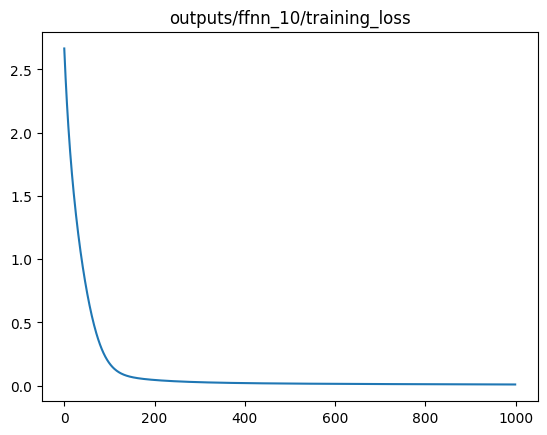

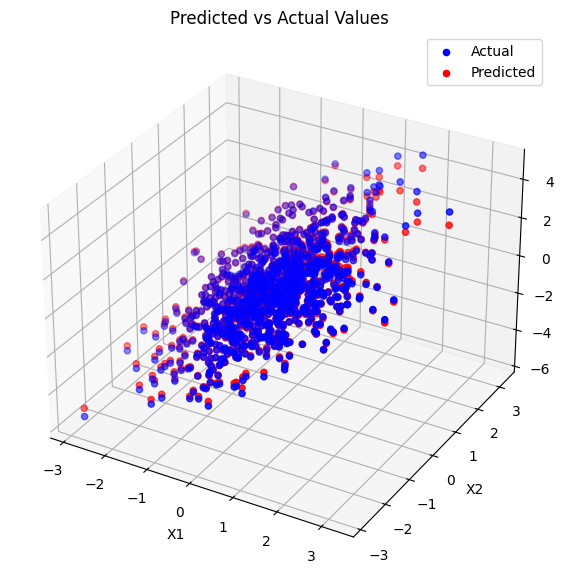

Epoch 100/1000, Loss: 0.04106469824910164
Epoch 200/1000, Loss: 0.010539268143475056
Epoch 300/1000, Loss: 0.0076170023530721664
Epoch 400/1000, Loss: 0.006188796833157539
Epoch 500/1000, Loss: 0.005166321527212858
Epoch 600/1000, Loss: 0.004335782025009394
Epoch 700/1000, Loss: 0.0036433034110814333
Epoch 800/1000, Loss: 0.003068232210353017
Epoch 900/1000, Loss: 0.002591250464320183
Epoch 1000/1000, Loss: 0.002193395746871829


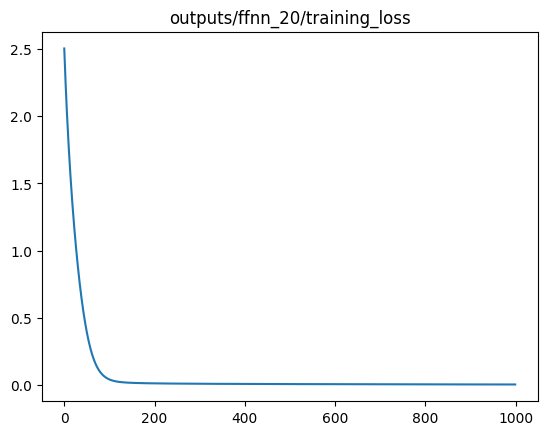

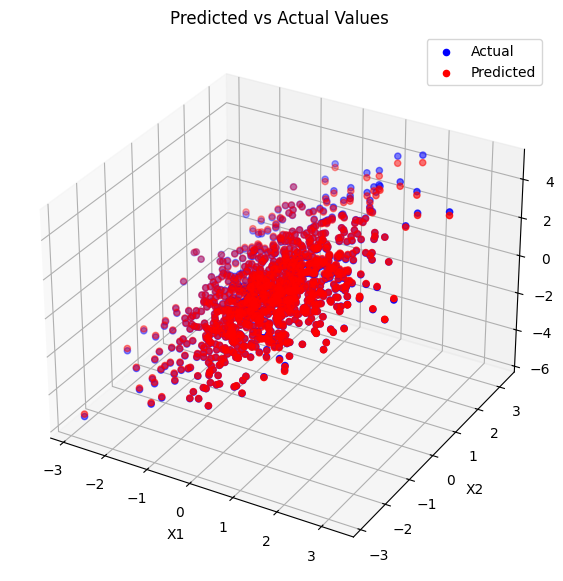

Epoch 100/1000, Loss: 0.033476900309324265
Epoch 200/1000, Loss: 0.00927415769547224
Epoch 300/1000, Loss: 0.007111907005310059
Epoch 400/1000, Loss: 0.005980613641440868
Epoch 500/1000, Loss: 0.005253711249679327
Epoch 600/1000, Loss: 0.004703883081674576
Epoch 700/1000, Loss: 0.00425706384703517
Epoch 800/1000, Loss: 0.003880235366523266
Epoch 900/1000, Loss: 0.0035614881198853254
Epoch 1000/1000, Loss: 0.0032875118777155876


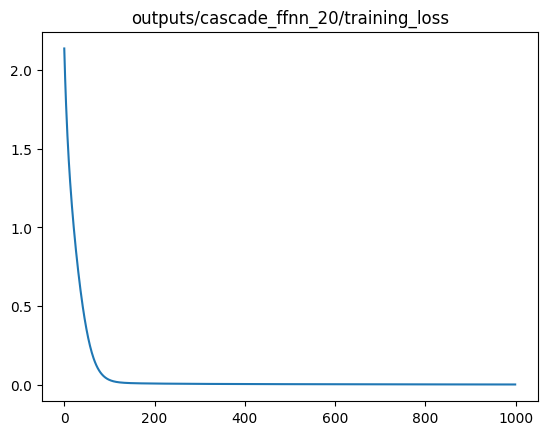

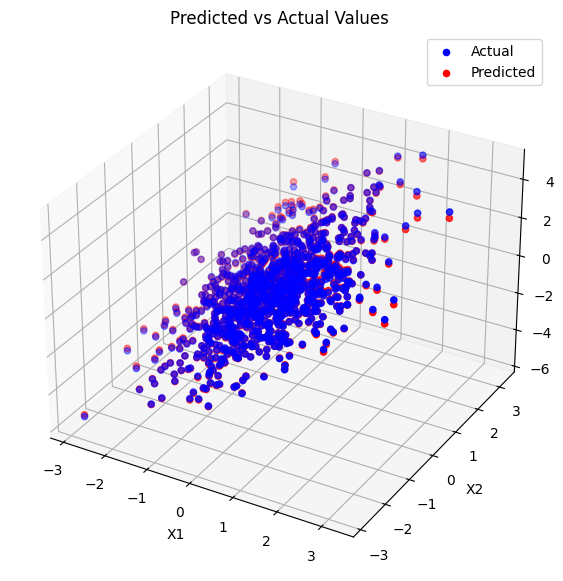

Epoch 100/1000, Loss: 1.9682633876800537
Epoch 200/1000, Loss: 1.869231104850769
Epoch 300/1000, Loss: 1.2316287755966187
Epoch 400/1000, Loss: 0.47386735677719116
Epoch 500/1000, Loss: 0.315085232257843
Epoch 600/1000, Loss: 0.22931163012981415
Epoch 700/1000, Loss: 0.17572695016860962
Epoch 800/1000, Loss: 0.14017468690872192
Epoch 900/1000, Loss: 0.1156117245554924
Epoch 1000/1000, Loss: 0.09786630421876907


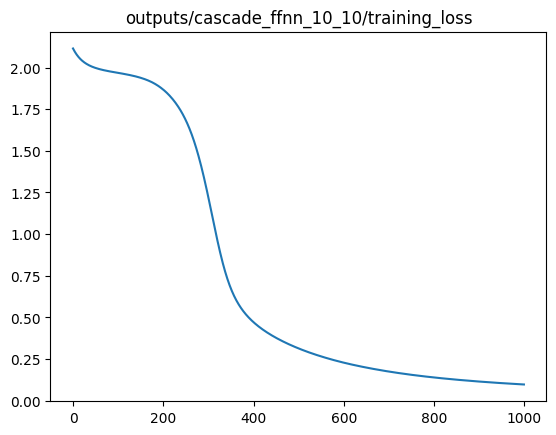

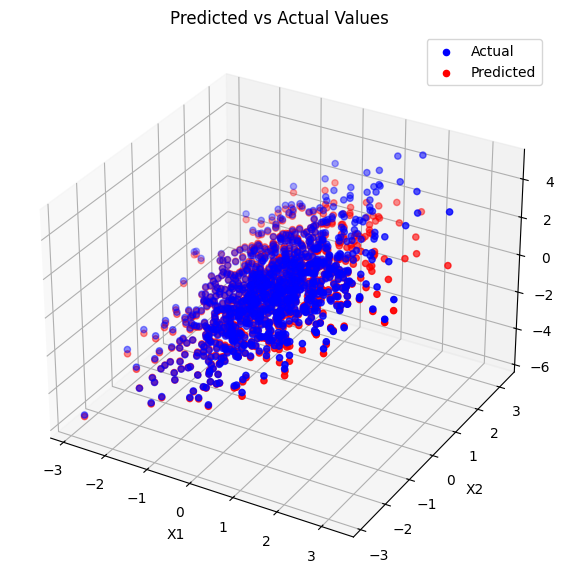

Epoch 100/1000, Loss: 0.3641723394393921
Epoch 200/1000, Loss: 0.11178244650363922
Epoch 300/1000, Loss: 0.048549383878707886
Epoch 400/1000, Loss: 0.024873754009604454
Epoch 500/1000, Loss: 0.01571723073720932
Epoch 600/1000, Loss: 0.011692626401782036
Epoch 700/1000, Loss: 0.009526492096483707
Epoch 800/1000, Loss: 0.008196397684514523
Epoch 900/1000, Loss: 0.007326164748519659
Epoch 1000/1000, Loss: 0.006691002286970615


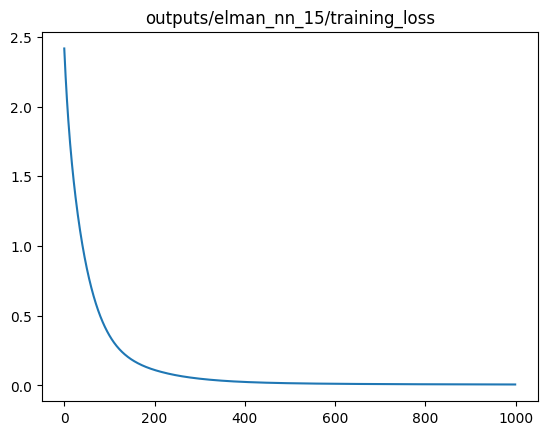

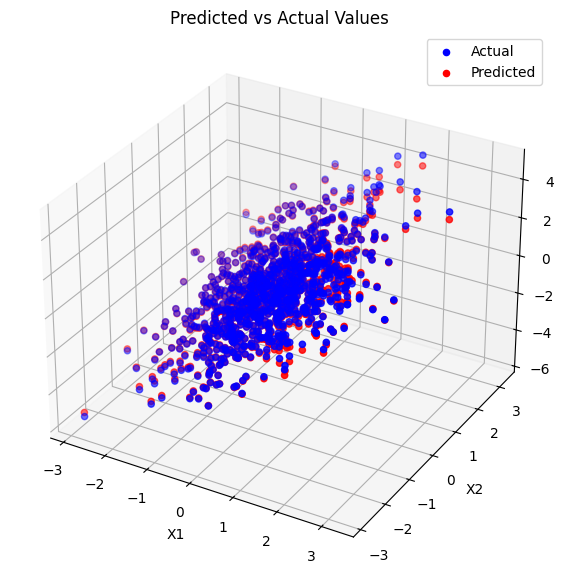

Epoch 100/1000, Loss: 1.9686799049377441
Epoch 200/1000, Loss: 1.939887523651123
Epoch 300/1000, Loss: 1.8613264560699463
Epoch 400/1000, Loss: 1.3992406129837036
Epoch 500/1000, Loss: 0.3471086919307709
Epoch 600/1000, Loss: 0.14671707153320312
Epoch 700/1000, Loss: 0.07652600854635239
Epoch 800/1000, Loss: 0.04039730876684189
Epoch 900/1000, Loss: 0.024476034566760063
Epoch 1000/1000, Loss: 0.016739068552851677


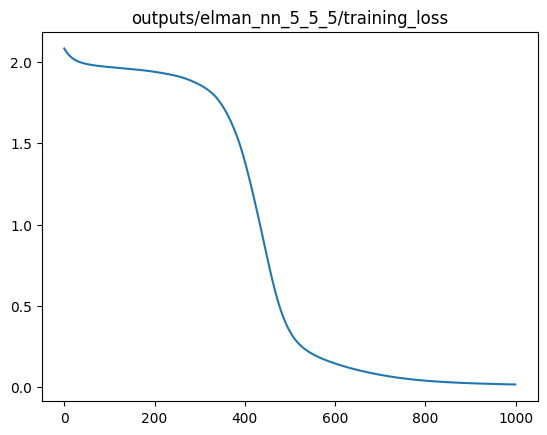

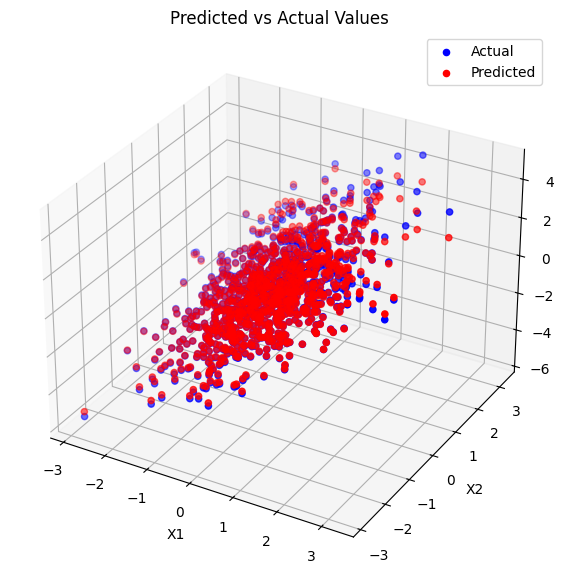

The best model is 'ffnn_20' with a validation loss of 0.002193395746871829.


In [89]:


models = [FFNN(10), FFNN(20), CascadeFFNN(20), CascadeFFNN(10, 10), ElmanNN(15), ElmanNN(5, 5, 5)]
model_names = ["ffnn_10", "ffnn_20", "cascade_ffnn_20", "cascade_ffnn_10_10", "elman_nn_15", "elman_nn_5_5_5"]

criterions = [nn.MSELoss() for _ in range(6)]
optimizers = [optim.SGD(model.parameters(), lr=0.01) for model in models]

validation_losses = []
for model, criterion, optimizer, model_name in zip(models, criterions, optimizers, model_names):
    loss = train_and_plot_model(model, criterion, optimizer, X, y, X_val, y_val, model_name)
    validation_losses.append((model_name, loss))

best_model_name = None
best_validation_loss = float('inf')

for model_name, losses in validation_losses:
    min_loss = min(losses)
    if min_loss < best_validation_loss:
        best_validation_loss = min_loss
        best_model_name = model_name

print(f"The best model is '{best_model_name}' with a validation loss of {best_validation_loss}.")
